<a href="https://colab.research.google.com/github/furlancad/Estudo-PMF/blob/main/An%C3%A1lise_de_A%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from datetime import datetime, timedelta

In [ ]:
# Definir ação
acao_definida = 'CMIG4'

In [ ]:
# Definir periodo de observação
periodo_definido = '5y'

In [ ]:
# Definir Benchmark
benchmark_definido = '^BVSP'

In [ ]:
acao_definida = acao_definida + '.SA'

In [ ]:
acao = yf.download(acao_definida, period=periodo_definido, auto_adjust=True, actions=True)
benchmark = yf.download(benchmark_definido, period=periodo_definido)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
benchmark.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03
mean,106752.079965,107767.649250,105740.591249,106773.601241,106773.601241,9.502636e+06
std,11291.836389,11111.257856,11417.503682,11274.237511,11274.237511,4.039162e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,100006.500000,101058.000000,99038.750000,100026.750000,100026.750000,6.029300e+06
50%,107795.000000,108668.000000,106948.000000,107743.500000,107743.500000,9.778900e+06
75%,115237.250000,116204.250000,114379.500000,115309.500000,115309.500000,1.207170e+07
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.602930e+07


In [ ]:
acao.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03,1240.000000,1240.000000
mean,7.819710,7.931000,7.700985,7.816560,1.341095e+07,0.003632,0.002787
std,2.339556,2.356692,2.320246,2.337766,6.600146e+06,0.035012,0.056872
min,3.562485,3.781996,3.448156,3.621935,0.000000e+00,0.000000,0.000000
25%,6.073942,6.157499,5.970018,6.071927,8.899120e+06,0.000000,0.000000
50%,7.042424,7.123868,6.960502,7.060316,1.175257e+07,0.000000,0.000000
75%,9.860411,10.003721,9.694594,9.847118,1.635762e+07,0.000000,0.000000
max,12.897855,13.094919,12.819030,12.956974,5.155080e+07,0.597418,1.300000


In [ ]:
acao.median()

Open            7.042424e+00
High            7.123868e+00
Low             6.960502e+00
Close           7.060316e+00
Volume          1.175257e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
dtype: float64

In [ ]:
acao.var()

Open            5.473521e+00
High            5.553997e+00
Low             5.383539e+00
Close           5.465149e+00
Volume          4.356192e+13
Dividends       1.225863e-03
Stock Splits    3.234445e-03
dtype: float64

In [ ]:
acao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2018-10-30 to 2023-10-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1240 non-null   float64
 1   High          1240 non-null   float64
 2   Low           1240 non-null   float64
 3   Close         1240 non-null   float64
 4   Volume        1240 non-null   int64  
 5   Dividends     1240 non-null   float64
 6   Stock Splits  1240 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 77.5 KB


In [ ]:
acao.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
acao.index

DatetimeIndex(['2018-10-30', '2018-10-31', '2018-11-01', '2018-11-05',
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-12', '2018-11-13',
               ...
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20',
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30'],
              dtype='datetime64[ns]', name='Date', length=1240, freq=None)

In [ ]:
acao.index = acao.index.tz_localize('UTC')
acao.index

DatetimeIndex(['2018-10-30 00:00:00+00:00', '2018-10-31 00:00:00+00:00',
               '2018-11-01 00:00:00+00:00', '2018-11-05 00:00:00+00:00',
               '2018-11-06 00:00:00+00:00', '2018-11-07 00:00:00+00:00',
               '2018-11-08 00:00:00+00:00', '2018-11-09 00:00:00+00:00',
               '2018-11-12 00:00:00+00:00', '2018-11-13 00:00:00+00:00',
               ...
               '2023-10-17 00:00:00+00:00', '2023-10-18 00:00:00+00:00',
               '2023-10-19 00:00:00+00:00', '2023-10-20 00:00:00+00:00',
               '2023-10-23 00:00:00+00:00', '2023-10-24 00:00:00+00:00',
               '2023-10-25 00:00:00+00:00', '2023-10-26 00:00:00+00:00',
               '2023-10-27 00:00:00+00:00', '2023-10-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1240, freq=None)

In [ ]:
acao.index = acao.index.tz_convert('America/Sao_Paulo')
acao.index

DatetimeIndex(['2018-10-29 21:00:00-03:00', '2018-10-30 21:00:00-03:00',
               '2018-10-31 21:00:00-03:00', '2018-11-04 22:00:00-02:00',
               '2018-11-05 22:00:00-02:00', '2018-11-06 22:00:00-02:00',
               '2018-11-07 22:00:00-02:00', '2018-11-08 22:00:00-02:00',
               '2018-11-11 22:00:00-02:00', '2018-11-12 22:00:00-02:00',
               ...
               '2023-10-16 21:00:00-03:00', '2023-10-17 21:00:00-03:00',
               '2023-10-18 21:00:00-03:00', '2023-10-19 21:00:00-03:00',
               '2023-10-22 21:00:00-03:00', '2023-10-23 21:00:00-03:00',
               '2023-10-24 21:00:00-03:00', '2023-10-25 21:00:00-03:00',
               '2023-10-26 21:00:00-03:00', '2023-10-29 21:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=1240, freq=None)

In [ ]:
acao.shape

(1240, 7)

In [ ]:
acao.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: >

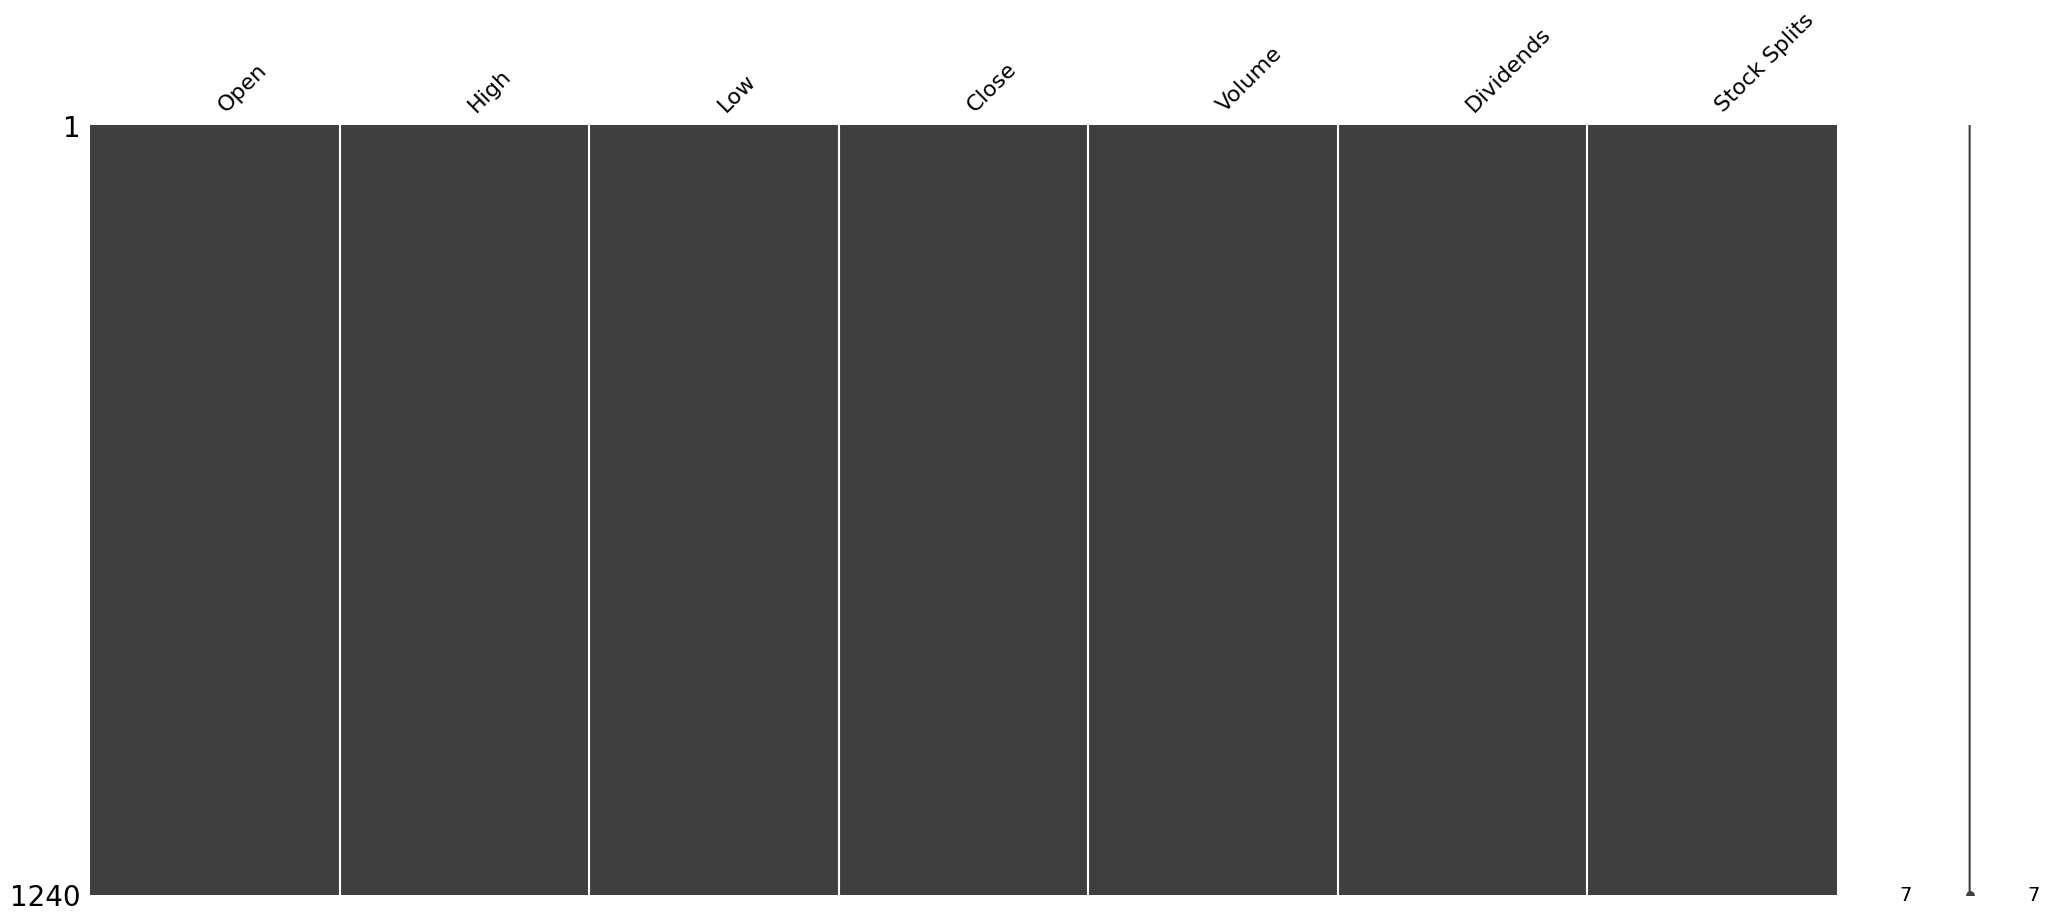

In [ ]:
msno.matrix(acao)

<Axes: >

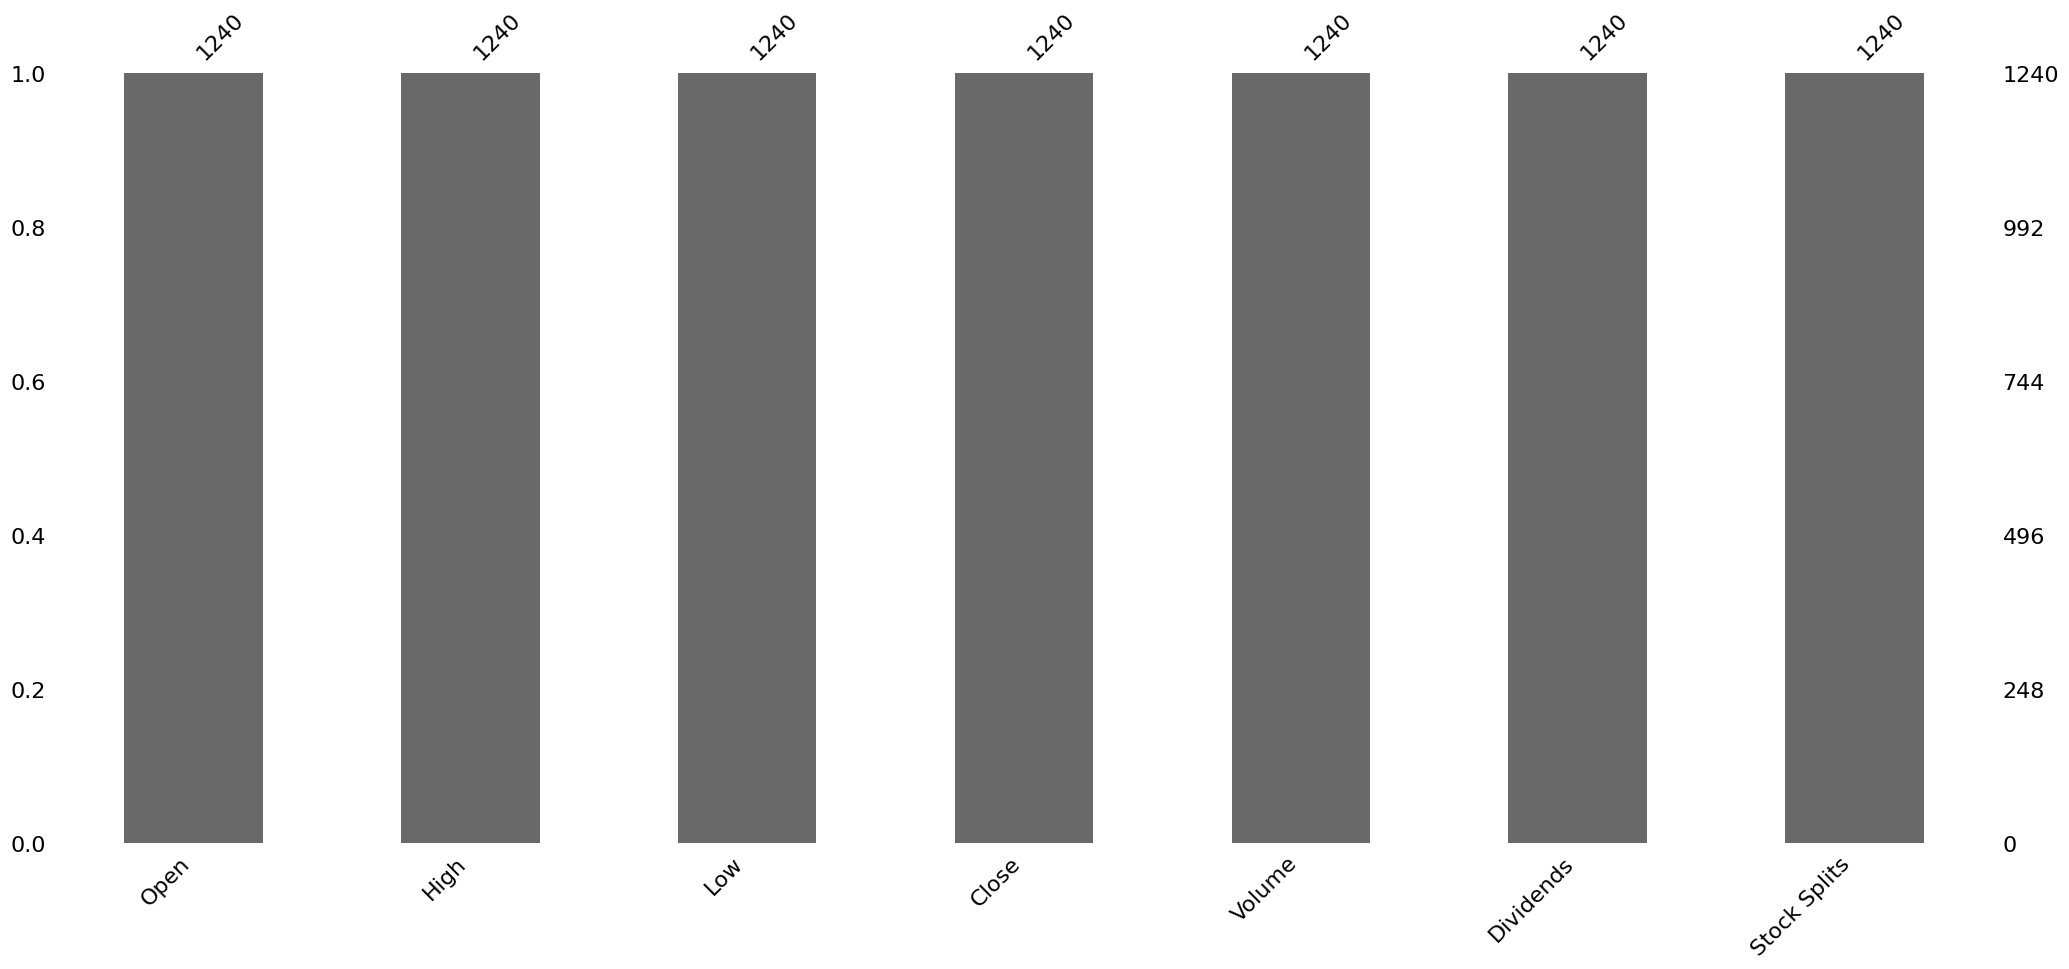

In [ ]:
msno.bar(acao)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

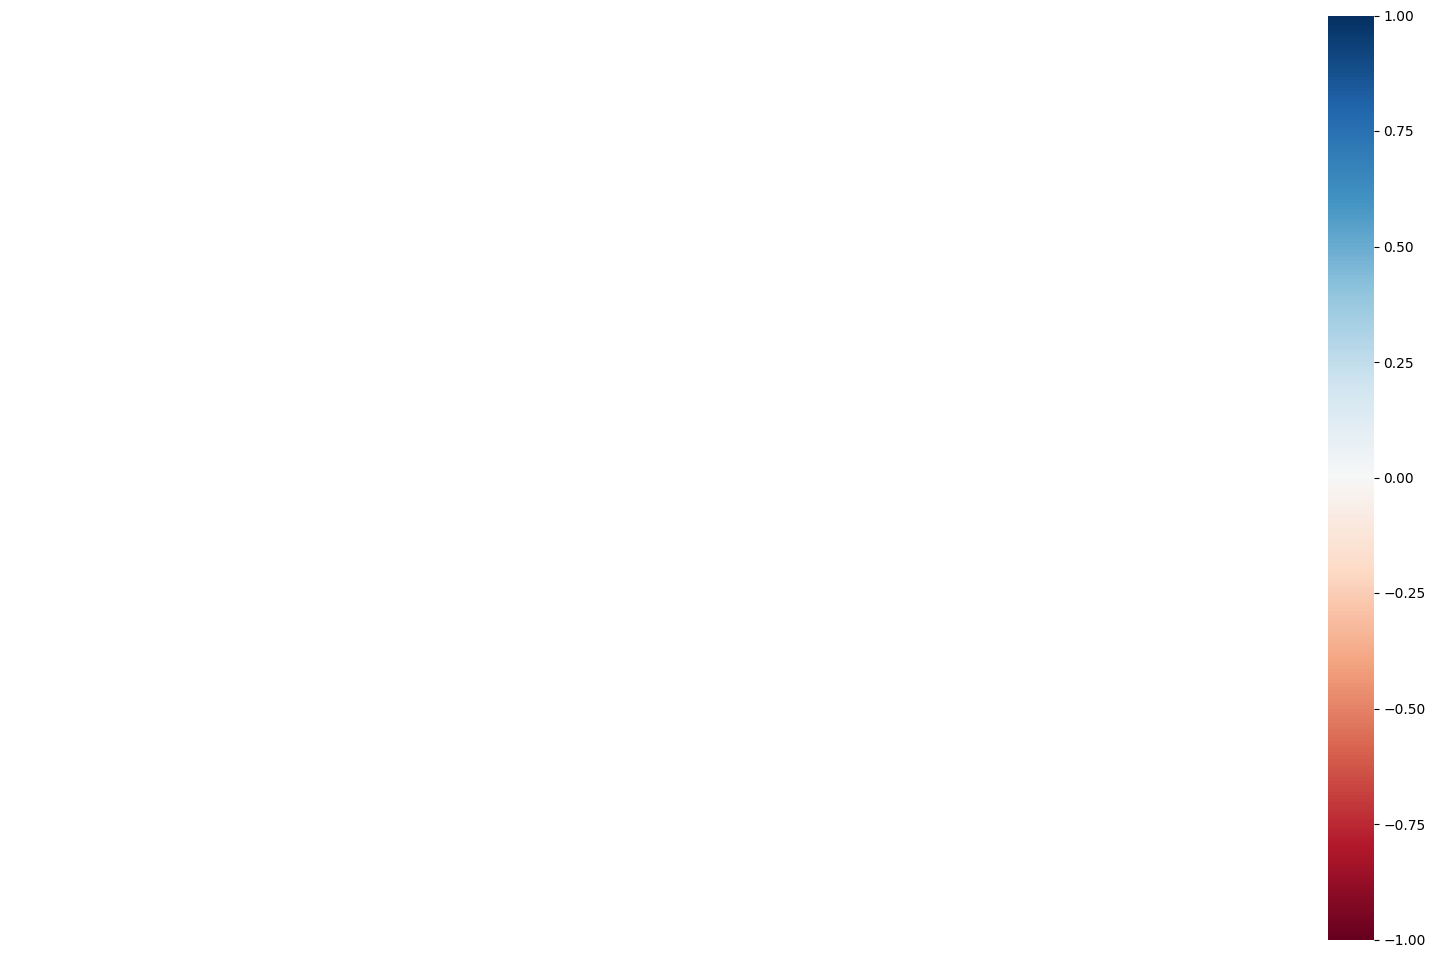

In [ ]:
msno.heatmap(acao)

In [ ]:
acao = acao.asfreq('D')
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-29 21:00:00-03:00,4.892267,4.926629,4.664619,4.836429,50919894.0,0.0,0.0
2018-10-30 21:00:00-03:00,4.857906,4.892267,4.707573,4.737639,26771033.0,0.0,0.0
2018-10-31 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0
2018-11-01 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-10-25 21:00:00-03:00,11.950000,12.180000,11.900000,12.160000,7682800.0,0.0,0.0
2023-10-26 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0
2023-10-27 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
acao.fillna(method='ffill', inplace=True)
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-29 21:00:00-03:00,4.892267,4.926629,4.664619,4.836429,50919894.0,0.0,0.0
2018-10-30 21:00:00-03:00,4.857906,4.892267,4.707573,4.737639,26771033.0,0.0,0.0
2018-10-31 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0
2018-11-01 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0
2018-11-02 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-25 21:00:00-03:00,11.950000,12.180000,11.900000,12.160000,7682800.0,0.0,0.0
2023-10-26 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0
2023-10-27 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0


In [ ]:
acao.sort_index(ascending=False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-29 21:00:00-03:00,11.950000,12.070000,11.920000,11.970000,2950700.0,0.0,0.0
2023-10-28 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0
2023-10-27 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0
2023-10-26 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0
2023-10-25 21:00:00-03:00,11.950000,12.180000,11.900000,12.160000,7682800.0,0.0,0.0
...,...,...,...,...,...,...,...
2018-11-02 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0
2018-11-01 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0
2018-10-31 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0


In [ ]:
acao.sort_values('Dividends', ascending=False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-01 21:00:00-03:00,9.488713,9.567859,9.321628,9.471126,29697200.0,0.597418,1.300000
2022-03-28 21:00:00-03:00,9.712225,9.801915,9.308617,9.379087,11226280.0,0.570889,0.000000
2021-12-21 21:00:00-03:00,8.193853,8.193853,7.944448,8.005279,9879220.0,0.434116,0.000000
2021-05-02 21:00:00-03:00,7.112197,7.240555,6.942998,7.059687,19667830.0,0.422017,1.114969
2019-05-05 21:00:00-03:00,6.283181,6.305589,6.171141,6.278699,10309564.0,0.298724,0.000000
...,...,...,...,...,...,...,...
2020-06-25 21:00:00-03:00,5.062478,5.089917,4.847540,4.847540,19164226.0,0.000000,0.000000
2020-06-24 21:00:00-03:00,5.048758,5.135647,4.993880,5.117355,10646692.0,0.000000,0.000000
2020-06-23 21:00:00-03:00,5.190526,5.213392,4.980161,5.048759,12137509.0,0.000000,0.000000


In [ ]:
acao.nlargest(5, 'Dividends')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-01 21:00:00-03:00,9.488713,9.567859,9.321628,9.471126,29697200.0,0.597418,1.300000
2022-03-28 21:00:00-03:00,9.712225,9.801915,9.308617,9.379087,11226280.0,0.570889,0.000000
2021-12-21 21:00:00-03:00,8.193853,8.193853,7.944448,8.005279,9879220.0,0.434116,0.000000
2021-05-02 21:00:00-03:00,7.112197,7.240555,6.942998,7.059687,19667830.0,0.422017,1.114969
2019-05-05 21:00:00-03:00,6.283181,6.305589,6.171141,6.278699,10309564.0,0.298724,0.000000


In [ ]:
acao.nsmallest(5, 'Volume')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-25 21:00:00-03:00,10.766622,10.766622,10.766622,10.766622,0.0,0.21428,0.0
2022-12-25 21:00:00-03:00,10.289822,10.317557,10.077184,10.132655,2067400.0,0.00000,0.0
2023-09-03 21:00:00-03:00,12.296809,12.365782,12.188424,12.237690,2655500.0,0.00000,0.0
2022-09-04 21:00:00-03:00,10.777132,10.893207,10.714630,10.812847,2761500.0,0.00000,0.0
2023-10-29 21:00:00-03:00,11.950000,12.070000,11.920000,11.970000,2950700.0,0.00000,0.0


In [ ]:
acao['Rentabilidade'] = acao['Close'].pct_change()*100
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-29 21:00:00-03:00,4.892267,4.926629,4.664619,4.836429,50919894.0,0.0,0.0,NaN
2018-10-30 21:00:00-03:00,4.857906,4.892267,4.707573,4.737639,26771033.0,0.0,0.0,-2.042616
2018-10-31 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0,-0.362677
2018-11-01 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0,0.000000
2018-11-02 21:00:00-03:00,4.767704,4.866495,4.703275,4.720457,33154581.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2023-10-25 21:00:00-03:00,11.950000,12.180000,11.900000,12.160000,7682800.0,0.0,0.0,2.616029
2023-10-26 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0,-1.891444
2023-10-27 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0,0.000000


In [ ]:
moving_average_50 = acao.rolling(50).mean()
moving_average_50

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-29 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-10-25 21:00:00-03:00,12.317198,12.428720,12.162547,12.281575,9288078.0,0.003799,0.0,0.043803
2023-10-26 21:00:00-03:00,12.319403,12.431534,12.161702,12.281530,9341798.0,0.003799,0.0,0.005974
2023-10-27 21:00:00-03:00,12.324367,12.435136,12.161646,12.280500,9323240.0,0.003799,0.0,-0.002284


In [ ]:
moving_average_200 = acao.iloc[:,0:4].rolling(200).mean()
moving_average_200

,Open,High,Low,Close
Date,,,,
2018-10-29 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-10-30 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-10-31 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-11-01 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-11-02 21:00:00-03:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-10-25 21:00:00-03:00,12.129919,12.255036,11.980486,12.119331
2023-10-26 21:00:00-03:00,12.134418,12.259066,11.983722,12.121902
2023-10-27 21:00:00-03:00,12.138244,12.261172,11.985948,12.123462


In [ ]:
benchmark = benchmark.asfreq('D')
benchmark

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-30,83802.00000,86990.000000,83802.000000,86886.000000,86886.000000,6556900.0
2018-10-31,86889.00000,88028.000000,86213.000000,87424.000000,87424.000000,5889800.0
2018-11-01,87428.00000,89017.000000,87094.000000,88419.000000,88419.000000,5878400.0
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-10-26,112840.00000,114886.000000,112840.000000,114777.000000,114777.000000,12770600.0
2023-10-27,114777.00000,115342.000000,112953.000000,113301.000000,113301.000000,12289500.0
2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
benchmark.fillna(method='ffill', inplace=True)
benchmark

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-30,83802.00000,86990.000000,83802.000000,86886.000000,86886.000000,6556900.0
2018-10-31,86889.00000,88028.000000,86213.000000,87424.000000,87424.000000,5889800.0
2018-11-01,87428.00000,89017.000000,87094.000000,88419.000000,88419.000000,5878400.0
2018-11-02,87428.00000,89017.000000,87094.000000,88419.000000,88419.000000,5878400.0
2018-11-03,87428.00000,89017.000000,87094.000000,88419.000000,88419.000000,5878400.0
...,...,...,...,...,...,...
2023-10-26,112840.00000,114886.000000,112840.000000,114777.000000,114777.000000,12770600.0
2023-10-27,114777.00000,115342.000000,112953.000000,113301.000000,113301.000000,12289500.0
2023-10-28,114777.00000,115342.000000,112953.000000,113301.000000,113301.000000,12289500.0


In [ ]:
benchmark['Rentabilidade'] = benchmark['Close'].pct_change()*100
benchmark

,Open,High,Low,Close,Adj Close,Volume,Rentabilidade
Date,,,,,,,
2018-10-30,83802.00000,86990.000000,83802.000000,86886.000000,86886.000000,6556900.0,NaN
2018-10-31,86889.00000,88028.000000,86213.000000,87424.000000,87424.000000,5889800.0,0.619202
2018-11-01,87428.00000,89017.000000,87094.000000,88419.000000,88419.000000,5878400.0,1.138131
2018-11-02,87428.00000,89017.000000,87094.000000,88419.000000,88419.000000,5878400.0,0.000000
2018-11-03,87428.00000,89017.000000,87094.000000,88419.000000,88419.000000,5878400.0,0.000000
...,...,...,...,...,...,...,...
2023-10-26,112840.00000,114886.000000,112840.000000,114777.000000,114777.000000,12770600.0,1.725605
2023-10-27,114777.00000,115342.000000,112953.000000,113301.000000,113301.000000,12289500.0,-1.285972
2023-10-28,114777.00000,115342.000000,112953.000000,113301.000000,113301.000000,12289500.0,0.000000


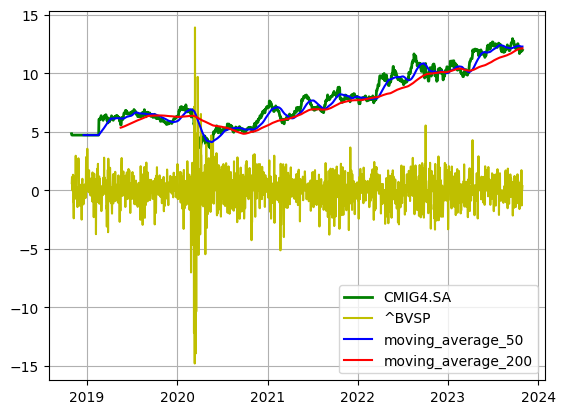

In [ ]:
plt.plot(acao['Close'].loc['2016-01-01':], 'g-', label='line 1', linewidth=2)
plt.plot(benchmark['Rentabilidade'].loc['2016-01-01':], 'y-', label='line 2',)
plt.plot(acao.Close.rolling(50).mean().loc['2016-01-01':], 'b-', label='line 2',)
plt.plot(acao.Close.rolling(200).mean().loc['2016-01-01':], 'r-', label='line 2',)

plt.legend([acao_definida, benchmark_definido, "moving_average_50", 'moving_average_200'])
plt.grid(True)

# Salve o gráfico como uma imagem
fig = plt.gcf()
fig.savefig("image.png")

In [ ]:
acao_weekly = acao.resample('7D').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_weekly

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-29 00:00:00-03:00,4.892267,4.926629,4.664619,4.720457,243463832.0
2018-11-05 00:00:00-02:00,4.767704,4.866495,4.703275,4.720457,232082067.0
2018-11-12 00:00:00-02:00,4.767704,4.866495,4.703275,4.720457,232082067.0
2018-11-19 00:00:00-02:00,4.767704,4.866495,4.703275,4.720457,232082067.0
2018-11-26 00:00:00-02:00,4.767704,4.866495,4.703275,4.720457,232082067.0
...,...,...,...,...,...
2023-09-25 00:00:00-03:00,12.740000,12.760000,12.190000,12.370000,51614000.0
2023-10-02 00:00:00-03:00,12.350000,12.410000,11.910000,12.370000,47778600.0
2023-10-09 00:00:00-03:00,12.430000,12.730000,12.100000,12.230000,58308900.0


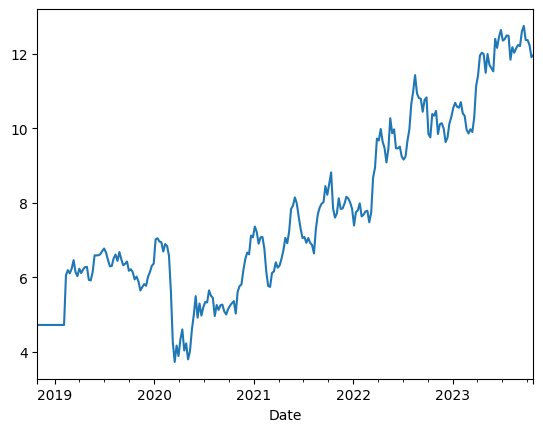

In [ ]:
acao_weekly.Close.plot();

In [ ]:
acao_month = acao.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_month

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-31 00:00:00-03:00,4.892267,4.926629,4.664619,4.720457,1.108455e+08
2018-11-30 00:00:00-02:00,4.767704,4.866495,4.703275,4.720457,9.946374e+08
2018-12-31 00:00:00-02:00,4.767704,4.866495,4.703275,4.720457,1.027792e+09
2019-01-31 00:00:00-02:00,4.767704,4.866495,4.703275,4.720457,1.027792e+09
2019-02-28 00:00:00-03:00,4.767704,6.504262,4.703275,6.104801,7.306176e+08
...,...,...,...,...,...
2023-06-30 00:00:00-03:00,11.490979,12.750056,11.423042,12.671230,3.771259e+08
2023-07-31 00:00:00-03:00,12.503726,12.759910,12.050478,12.444607,2.319282e+08
2023-08-31 00:00:00-03:00,12.434753,12.710643,11.607084,12.277102,3.107415e+08


In [ ]:
type(acao_month.Close)

pandas.core.series.Series

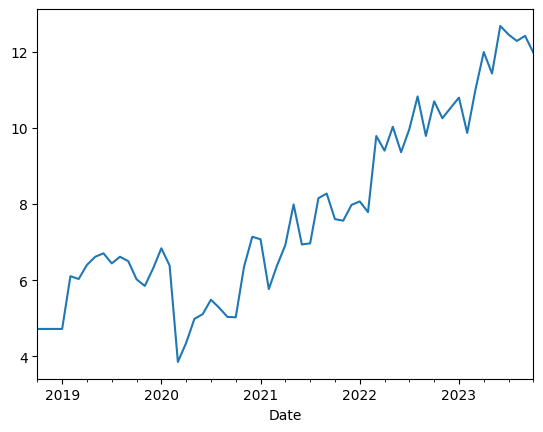

In [ ]:
acao_month.Close.plot();

In [ ]:
acao_trimestre = acao.resample('Q').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_trimestre

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31 00:00:00-02:00,4.892267,4.926629,4.664619,4.720457,2.133275e+09
2019-03-31 00:00:00-03:00,4.767704,6.504262,4.703275,6.030989,2.212881e+09
2019-06-30 00:00:00-03:00,6.074408,7.054012,5.575090,6.704450,1.396454e+09
2019-09-30 00:00:00-03:00,6.708931,6.986789,6.112881,6.498295,1.293471e+09
2019-12-31 00:00:00-03:00,6.444517,6.453480,5.467533,6.306375,1.043962e+09
2020-03-31 00:00:00-03:00,6.320094,7.413078,3.448156,3.855166,1.554224e+09
2020-06-30 00:00:00-03:00,3.855166,5.592963,3.466448,5.108209,1.968307e+09
2020-09-30 00:00:00-03:00,5.167661,5.794182,4.876435,5.035869,1.443993e+09
2020-12-31 00:00:00-03:00,4.986834,7.193396,4.913282,7.139459,1.317386e+09


In [ ]:
type(acao_trimestre.Close)

pandas.core.series.Series

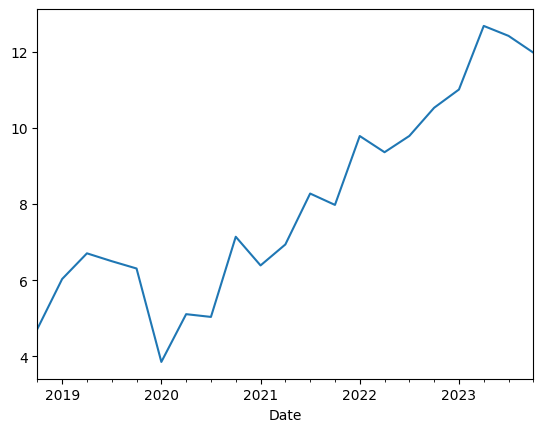

In [ ]:
acao_trimestre.Close.plot();

In [ ]:
data_atual = '04-01-2022'

In [ ]:
datetime.strptime(data_atual, '%d-%m-%Y')

datetime.datetime(2022, 1, 4, 0, 0)

In [ ]:
data_hora_atual = datetime.now()

In [ ]:
data_hora_atual

datetime.datetime(2023, 10, 30, 15, 29, 51, 323258)

In [ ]:
datetime.strftime(data_hora_atual, '%d-%m-%Y')

'30-10-2023'

In [ ]:
data_200_dias_atras = datetime.now() - timedelta(days=200)
data_200_dias_atras

datetime.datetime(2023, 4, 13, 15, 29, 51, 372599)